In [1]:
import pandas as pd
import numpy as np
import joblib
import altair as alt

In [2]:
runlog = joblib.load('results2.joblib')

In [3]:
runlog = pd.DataFrame(runlog)

In [4]:
runlog = runlog.melt(var_name="Run", value_name="Mean_Accuracy")

In [5]:
runlog['Run'].unique()

array(['5 Features', '10 Features', '15 Features', '20 Features',
       '25 Features', '30 Features', '35 Features', '40 Features',
       '45 Features', '50 Features', '55 Features', '60 Features',
       '65 Features', '70 Features', '75 Features', '80 Features',
       '85 Features', '90 Features', '95 Features', '100 Features'],
      dtype=object)

In [6]:
order = list(range(1, len(runlog['Run'].unique())+1))

In [7]:
order_dict = {x: y for x, y in zip(runlog['Run'].unique(), order)}

In [8]:
runlog['Order'] = runlog['Run'].map(order_dict)

In [9]:
sort_order = list(runlog['Run'].unique())

In [10]:
sort_order

['5 Features',
 '10 Features',
 '15 Features',
 '20 Features',
 '25 Features',
 '30 Features',
 '35 Features',
 '40 Features',
 '45 Features',
 '50 Features',
 '55 Features',
 '60 Features',
 '65 Features',
 '70 Features',
 '75 Features',
 '80 Features',
 '85 Features',
 '90 Features',
 '95 Features',
 '100 Features']

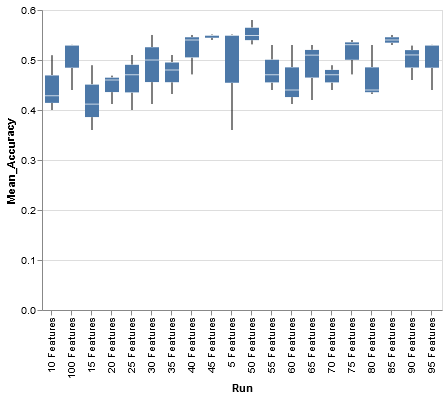

In [11]:
alt.Chart(runlog).mark_boxplot().encode(
    x=alt.X("Run", sort=sort_order),
    y="Mean_Accuracy"
)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

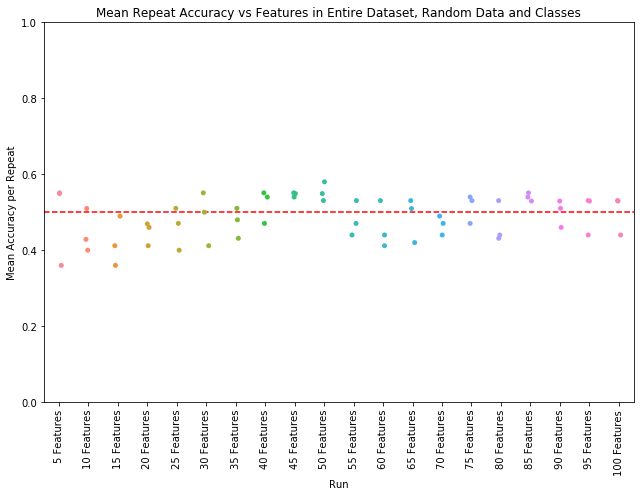

In [15]:
fig, ax = plt.subplots(figsize=(9,7))
sns.stripplot(x="Run", y="Mean_Accuracy", data=runlog)
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.axhline(.5, linestyle='--', color='r')
plt.ylabel("Mean Accuracy per Repeat")
plt.title("Mean Repeat Accuracy vs Features in Entire Dataset, Random Data and Classes")
plt.tight_layout()
plt.savefig("20191125_benchmark_b.png")